In [2]:
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd 
%matplotlib inline

In [8]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=23) # this library gives y value also but we ignore that value

In [49]:
X.shape

(1000, 2)

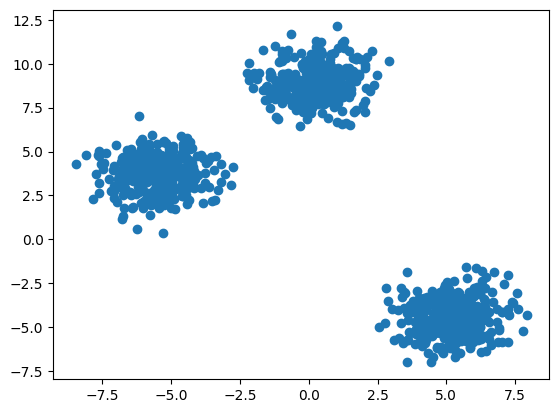

In [11]:
plt.scatter(X[:,0],X[:,1])

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)


In [17]:
from sklearn.cluster import KMeans

In [19]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [20]:
wcss

[41167.283407539,
 9544.872623190913,
 1570.3723999827841,
 1422.4586730247995,
 1183.7287572299165,
 1071.041625679357,
 917.6551796368036,
 809.9880802062228,
 748.0074630302514,
 647.5242895750127]

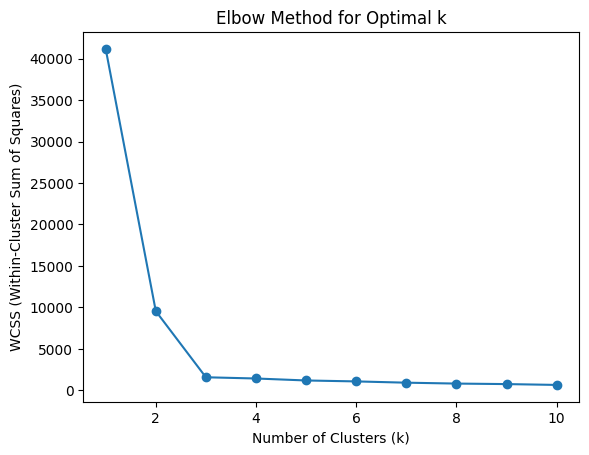

In [24]:
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.show()

In [53]:
    kmeans=KMeans(n_clusters=3,init="k-means++")
    y_labels=kmeans.fit_predict(X_train)   #kmeans.fit(X_train)  y_labels = kmeans.predict(X_train) the syntax we have used is the shortcut of this

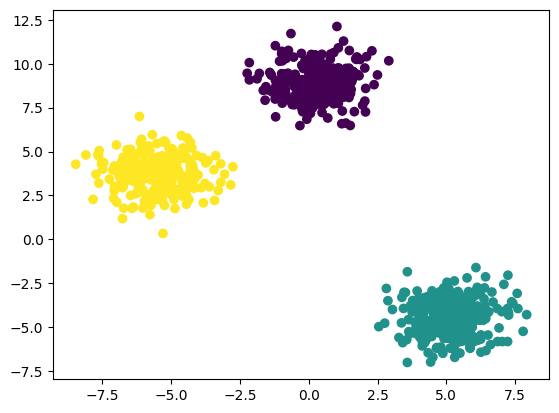

In [28]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [31]:
    y_test_labels=kmeans.predict(X_test)

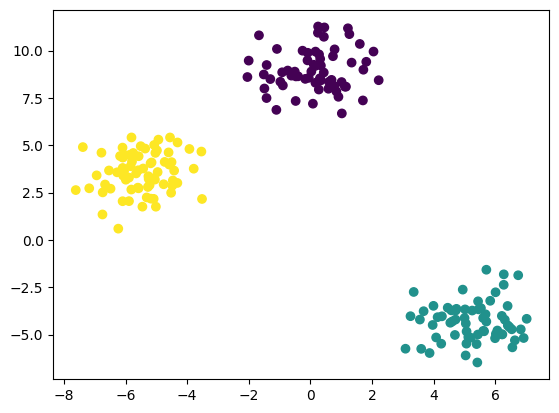

In [32]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_labels)

In [33]:
#to automate this process we use kneed library

In [35]:
from kneed import KneeLocator

In [41]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")
kl.elbow # means instead of plots you have to use this library 

np.int64(3)

In [44]:
from sklearn.metrics import silhouette_score
silhouette_coefficient=[]
for k in range(2,11):

    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficient.append(score)

In [45]:
silhouette_coefficient

[0.7258310358179207,
 0.8068049253852778,
 0.6371021352736821,
 0.47548434980541004,
 0.4895350970630096,
 0.3271130455372382,
 0.33449611314791455,
 0.34121711331663407,
 0.3316476292228958]

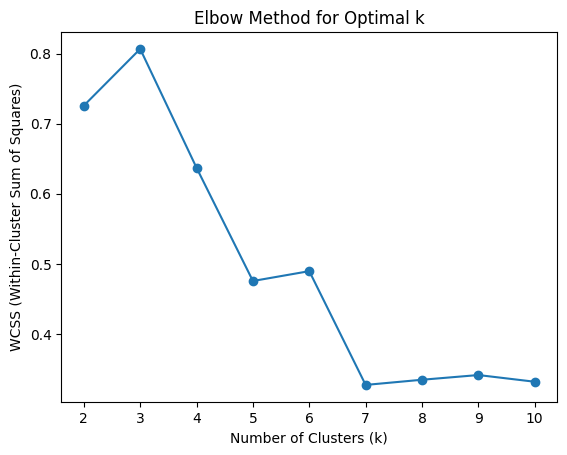

In [46]:
plt.plot(range(2, 11), silhouette_coefficient, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.show()